## 資料前處理

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot

In [421]:
data1 = pd.read_csv("./Spotify-2000.csv")
print(data1.shape)
print(data1.head())

data2 = pd.read_csv("./top10s.csv" , encoding='unicode_escape')
print(data2.shape)
print(data2.head())

(1994, 15)
   Index                   Title             Artist            Top Genre  \
0      1                 Sunrise        Norah Jones      adult standards   
1      2             Black Night        Deep Purple           album rock   
2      3          Clint Eastwood           Gorillaz  alternative hip hop   
3      4           The Pretender       Foo Fighters    alternative metal   
4      5  Waitin' On A Sunny Day  Bruce Springsteen         classic rock   

   Year  Beats Per Minute (BPM)  Energy  Danceability  Loudness (dB)  \
0  2004                     157      30            53            -14   
1  2000                     135      79            50            -11   
2  2001                     168      69            66             -9   
3  2007                     173      96            43             -4   
4  2002                     106      82            58             -5   

   Liveness  Valence Length (Duration)  Acousticness  Speechiness  Popularity  
0        11       6

In [422]:
# 統一兩個dataset的columns(因為順序都一樣)
data2.columns = data1.columns
data2.head()

# 合併兩個資料集成一個
data = data1.append(data2, ignore_index=True)
print(data.shape)
print(data.head())

(2597, 15)
   Index                   Title             Artist            Top Genre  \
0      1                 Sunrise        Norah Jones      adult standards   
1      2             Black Night        Deep Purple           album rock   
2      3          Clint Eastwood           Gorillaz  alternative hip hop   
3      4           The Pretender       Foo Fighters    alternative metal   
4      5  Waitin' On A Sunny Day  Bruce Springsteen         classic rock   

   Year  Beats Per Minute (BPM)  Energy  Danceability  Loudness (dB)  \
0  2004                     157      30            53            -14   
1  2000                     135      79            50            -11   
2  2001                     168      69            66             -9   
3  2007                     173      96            43             -4   
4  2002                     106      82            58             -5   

   Liveness  Valence Length (Duration)  Acousticness  Speechiness  Popularity  
0        11       6

In [423]:
# 丟掉2000年以前的資料
data.drop(data[data.Year < 2000].index, inplace=True)
data.shape
data

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2592,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
2593,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
2594,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
2595,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [424]:
data.shape, data.columns

((1402, 15),
 Index(['Index', 'Title', 'Artist', 'Top Genre', 'Year',
        'Beats Per Minute (BPM)', 'Energy', 'Danceability', 'Loudness (dB)',
        'Liveness', 'Valence', 'Length (Duration)', 'Acousticness',
        'Speechiness', 'Popularity'],
       dtype='object'))

In [495]:
temp = data.drop(columns = ['index'])
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1402 entries, 0 to 1401
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1402 non-null   int64 
 1   Title                   1402 non-null   object
 2   Artist                  1402 non-null   object
 3   Top Genre               1402 non-null   object
 4   Year                    1402 non-null   int64 
 5   Beats Per Minute (BPM)  1402 non-null   int64 
 6   Energy                  1402 non-null   int64 
 7   Danceability            1402 non-null   int64 
 8   Loudness (dB)           1402 non-null   int64 
 9   Liveness                1402 non-null   int64 
 10  Valence                 1402 non-null   int64 
 11  Length (Duration)       1402 non-null   object
 12  Acousticness            1402 non-null   int64 
 13  Speechiness             1402 non-null   int64 
 14  Popularity              1402 non-null   int64 
dtypes: i

In [426]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Index,1402.0,357.850214,213.863736,1.0,176.00,351.0,526.0,799.0
Year,1402.0,2011.748217,5.165783,2000.0,2008.00,2013.0,2016.0,2019.0
Beats Per Minute (BPM),1402.0,120.068474,27.096721,0.0,100.00,120.0,133.0,206.0
Energy,1402.0,66.077033,19.545545,0.0,54.00,70.0,81.0,99.0
Danceability,1402.0,58.512839,15.185418,0.0,49.00,60.0,69.0,97.0
Loudness (dB),1402.0,-6.682596,3.020954,-60.0,-8.00,-6.0,-5.0,-2.0
Liveness,1402.0,18.732525,15.793065,0.0,9.00,12.0,23.0,99.0
Valence,1402.0,48.475036,23.551054,0.0,29.25,47.0,66.0,98.0
Acousticness,1402.0,21.240371,26.807267,0.0,2.00,8.0,32.0,99.0
Speechiness,1402.0,6.625535,6.293920,0.0,3.00,4.0,7.0,48.0


In [427]:
data.reset_index(inplace=True)

In [428]:
for i in range(0, len(data['Top Genre'])):
    if(data['Top Genre'][i].find("pop") != -1):
        data['Top Genre'][i] = "pop"
    elif(data['Top Genre'][i].find("hip hop") != -1):
        data['Top Genre'][i] = "hip hop"
    elif(data['Top Genre'][i].find("r&b") != -1):
        data['Top Genre'][i] = "r&b"
    elif(data['Top Genre'][i].find("folk") != -1):
        data['Top Genre'][i] = "folk"
    elif(data['Top Genre'][i].find("metal") != -1):
        data['Top Genre'][i] = "metal"
    elif(data['Top Genre'][i].find("jazz") != -1):
        data['Top Genre'][i] = "jazz"
    elif(data['Top Genre'][i].find("rock") != -1):
        data['Top Genre'][i] = "rock"
    elif(data['Top Genre'][i].find("edm") != -1):
        data['Top Genre'][i] = "edm"
unique_genre = data['Top Genre'].unique()

D:\Users\Selena Huang\temp/ipykernel_14144/2133839852.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

D:\Users\Selena Huang\temp/ipykernel_14144/2133839852.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

D:\Users\Selena Huang\temp/ipykernel_14144/2133839852.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

D:\Users\Selena Huang\temp/ipykernel_14144/2133839852.py:3: SettingWithCopyWarning:


A value is trying to be set on a 

In [429]:
# 只留下前10大類，剩餘小類當作others
top10_genre = list(data['Top Genre'].value_counts()[:10].index)
print(data['Top Genre'][:10])
for i in range(0, len(data['Top Genre'])):
    if(data['Top Genre'][i] not in top10_genre):
        data['Top Genre'][i] = "others"
print(data['Top Genre'][:10])

0    adult standards
1               rock
2            hip hop
3              metal
4               rock
5                pop
6                pop
7               rock
8               rock
9            hip hop
Name: Top Genre, dtype: object
0    adult standards
1               rock
2            hip hop
3              metal
4               rock
5                pop
6                pop
7               rock
8               rock
9            hip hop
Name: Top Genre, dtype: object


D:\Users\Selena Huang\temp/ipykernel_14144/496777668.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [430]:
data['Top Genre'].value_counts()

pop                724
others             215
rock               186
dutch indie         52
metal               42
hip hop             40
british soul        36
permanent wave      33
dutch cabaret       27
neo mellow          26
adult standards     21
Name: Top Genre, dtype: int64

## 資料EDA

In [431]:
songs_per_years = data['Year'].value_counts().sort_index()

iplot(px.bar(songs_per_years, 
       title='Number of songs per year', 
       text_auto='.2s',
       labels=dict(index='year',value='number of songs'),
       color_discrete_sequence=['#1DB954']
      ).update_xaxes(type='category'))

In [432]:
artists = data['Artist'].value_counts()
artists

Coldplay                    31
Adele                       24
Ed Sheeran                  23
Lady Gaga                   18
Rihanna                     18
                            ..
Cyndi Lauper                 1
Fink                         1
Wolfmother                   1
Jeroen van Koningsbrugge     1
Daddy Yankee                 1
Name: Artist, Length: 523, dtype: int64

In [433]:
iplot(px.pie(values=[artists[:50].sum(),1402-artists[:50].sum()], 
       names=['top 50 artists',f'remaining {523-50} artists'], 
       title="How many songs do the top 50 artists have",
       color_discrete_sequence = ['mediumpurple', 'moccasin']
      ).update_traces(textinfo='value+percent'))

In [434]:
artist_df = data[['Artist', 'Popularity']].groupby('Artist').mean().sort_values(by='Artist')
artists = artists.sort_index()
artist_df['Total songs'] = artists.values
artist_df.sort_values(by='Total songs',ascending=False, inplace=True)
artist_df.reset_index(inplace=True)
    
pmean = 0
for i in range(523):
    pmean = pmean + artist_df['Popularity'][i]
pmean = pmean / 523
print(pmean)

iplot(px.scatter(artist_df[:523], 
           x='Artist', 
           y='Popularity', 
           size='Total songs',
           size_max=40,
           color='Popularity',
           title='All artists vs average popularity of their top hits',
           hover_name='Total songs'
          ))

58.60392149722258


In [440]:
from plotly.subplots import make_subplots

histogram_labels = ['Popularity',
                    'Danceability', 
                    'Energy', 
                    'Loudness (dB)', 
                    'Speechiness',
                    'Acousticness', 
                    'Liveness', 
                    'Valence',
                    'Beats Per Minute (BPM)',
                    'Year'
                   ]

colors = px.colors.qualitative.Vivid
for i in range(len(histogram_labels)):
    fig = px.histogram(data, 
                       histogram_labels[i], 
                       title=f'{histogram_labels[i]} distribution in top hits', 
                       height=400, 
                       width=500,
                       color_discrete_sequence=[colors[i]]
                      )
    iplot(fig)

In [436]:
def split_genres(genre):
    g = genre.replace(' ','').split(',')
    g = [t for t in g if t!='set()']
    return g

def flatten(t):
    return [item for sublist in t for item in sublist]

def remove_duplicates(l):
    res = []
    l = [res.append(x) for x in l if x not in res]
    return res

all_genres = remove_duplicates(flatten(list(data['Top Genre'].apply(split_genres))))

genre_count = {genre: 0 for genre in all_genres}

for song in list(data['Top Genre']):
    for genre in split_genres(song):
        genre_count[genre]+=1

In [437]:
iplot(px.pie(names=genre_count.keys(), 
       values=[genre_count[key] for key in genre_count.keys()],
       title="Genre Distribution"
      ).update_traces(textinfo='label+percent'))

## Kmeans 分群

In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot
from sklearn.cluster import KMeans

In [308]:
x = data[['Popularity','Danceability','Energy','Loudness (dB)','Speechiness','Acousticness','Liveness','Valence','Beats Per Minute (BPM)']]
x

,Popularity,Danceability,Energy,Loudness (dB),Speechiness,Acousticness,Liveness,Valence,Beats Per Minute (BPM)
0,71,53,30,-14,3,94,11,68,157
1,39,50,79,-11,7,17,17,81,135
2,69,66,69,-9,17,2,7,52,168
3,76,43,96,-4,4,0,3,37,173
4,59,58,82,-5,3,1,10,87,106
...,...,...,...,...,...,...,...,...,...
1397,75,61,66,-7,3,1,20,16,104
1398,75,75,79,-6,12,21,7,61,95
1399,70,53,76,-5,34,7,9,65,136
1400,69,60,79,-6,7,1,42,24,114


C:\Users\Selena Huang\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.



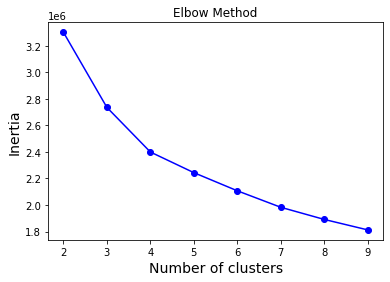

In [312]:
#Elbow Method(evaluate inertias)
kmeans_list = [KMeans(n_clusters=k, random_state=46).fit(x) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_list[1:]]

plt.plot(range(2, 10), inertias, "bo-")
plt.title('Elbow Method')
plt.xlabel('Number of clusters', fontsize=14)
plt.ylabel("Inertia", fontsize=14)
# plt.annotate('Elbow',
#              xy=(3, inertias[1]),
#              xytext=(0.55, 0.55),
#              textcoords='figure fraction',
#              fontsize=14,
#              arrowprops=dict(facecolor='black', shrink=0.1)
#             )

plt.show()

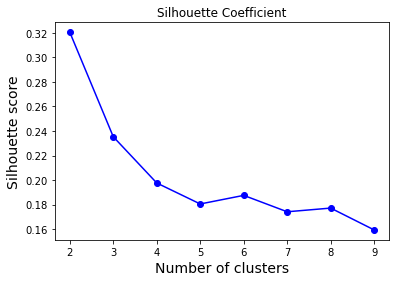

In [313]:
#Silhouette Coefficient
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(x, model.labels_) for model in kmeans_list[1:]]

plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.title('Silhouette Coefficient')
plt.xlabel('Number of clusters', fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)

plt.show()

In [314]:
kmeansModel = KMeans(init = 'k-means++', n_clusters=3, random_state=46)
kmeansModel.fit(x)
clusters_pred = kmeansModel.fit_predict(x)
x.shape

(1402, 9)

In [315]:
from sklearn.decomposition import PCA
pca = PCA(2)
df = pca.fit_transform(x)
df.shape

(1402, 2)

In [316]:
# #Getting unique labels
# filtered_label0 = df[clusters_pred == 0]
# filtered_label1 = df[clusters_pred == 1]

# #Plotting the results
# plt.scatter(filtered_label0[:,0] , filtered_label0[:,1] , color = 'b')
# plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'b')

# plt.show()

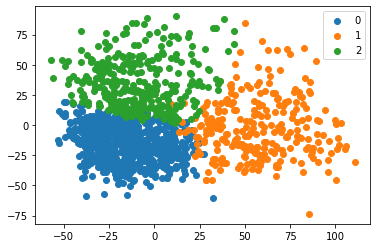

In [317]:
#Getting the Centroids
centroids = kmeansModel.cluster_centers_
#Getting unique labels
u_clusters_pred = np.unique(clusters_pred)

#Plotting the results
for i in u_clusters_pred:
    plt.scatter(df[clusters_pred == i , 0] , df[clusters_pred == i , 1] , label = i)

plt.legend()
plt.show()

In [122]:
Centers = kmeansModel.cluster_centers_

Clustering_Centers = pd.DataFrame(Centers)
Clustering_Centers.to_csv('Clustering_Centers_KMeans.csv',mode = 'a', header=True)

In [123]:
Clustering_result = pd.DataFrame(data)
Clustering_result["Clustering_result"] = clusters_pred

Clustering_result.to_csv('Clustering_result_KMeans.csv',mode = 'a', header=True)

## 決策樹

In [42]:
x = data.drop(columns = ['Artist','Title','Top Genre','Length (Duration)','Year'])
y = data['Top Genre']

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2 ,random_state=3)

In [44]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [45]:
pred_model = model.predict(x_test)

from sklearn.metrics import accuracy_score
print('Accuracy of the model is {:.0%}'.format(accuracy_score(y_test, pred_model)))

model.score(x_test, y_test)

Accuracy of the model is 48%


0.4804270462633452

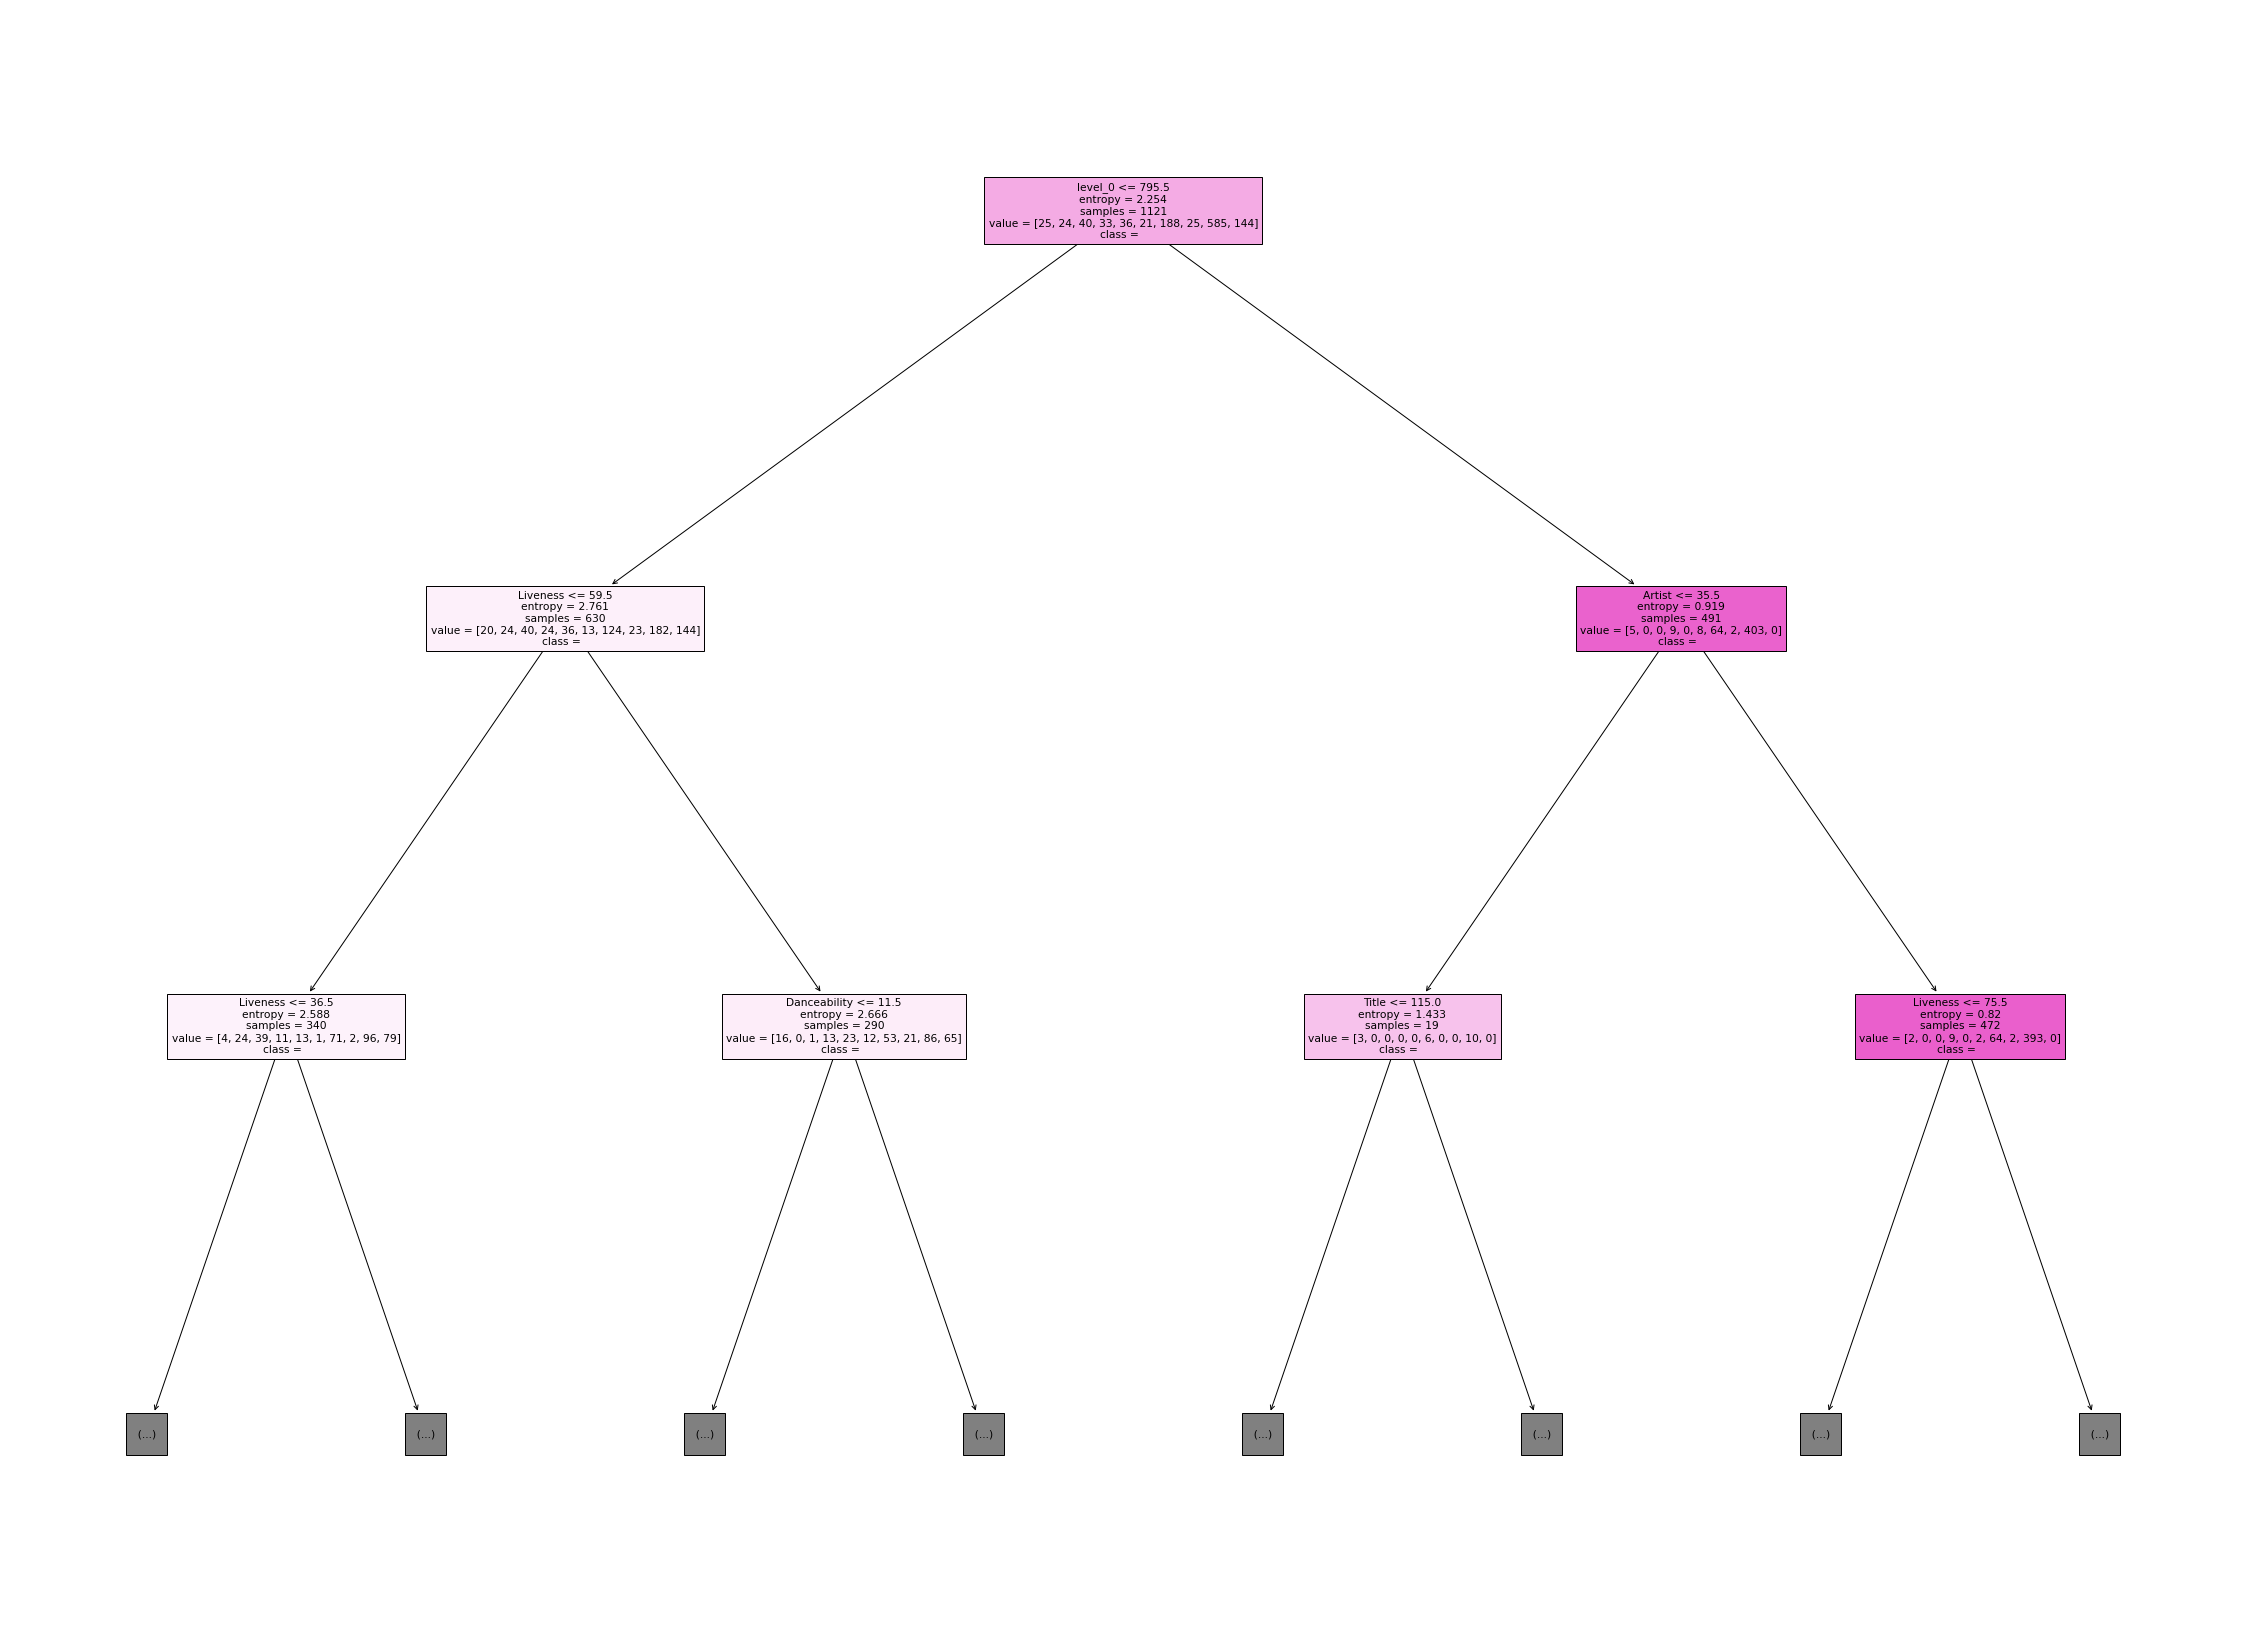

In [48]:
from sklearn.tree import plot_tree
feature_names = data.columns[:18]
target_names = str(data['Popularity'].unique())

from matplotlib.pyplot import figure
plt.figure(figsize=(40,30))

plot_tree(model,
          max_depth = 2,
          feature_names = feature_names, 
          class_names = target_names,
          impurity = True,
          filled = True)

plt.savefig('tree_visualization.png') 

## 迴歸分析

In [320]:
artist_df = data[['Artist', 'Popularity']].groupby('Artist').mean().sort_values(by='Artist')
artists = artists.sort_index()
artist_df['Total songs'] = artists.values
artist_df.sort_values(by='Total songs',ascending=False, inplace=True)
artist_df.reset_index(inplace=True)

# top_50_artist_2 = []
# for i in range(1402):
#  if data['Artist'][i] in top_50_artist:
#     top_50_artist_2.append()
# filt = (df['Job'] == 'Student')

top_50_artist = artist_df['Artist'][:50]

mask = data['Artist'] .isin(top_50_artist)
data_top_50_artist = data[mask]
data_top_50_artist   

,level_0,index,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,Clustering_result
3,3,3,4,The Pretender,Foo Fighters,metal,2007,173,96,43,-4,3,37,269,0,4,76,0
6,6,6,7,She Will Be Loved,Maroon 5,pop,2002,102,71,71,-6,13,54,257,6,3,74,2
7,7,7,8,Knights of Cydonia,Muse,rock,2006,137,96,37,-5,12,21,366,0,14,69,0
9,9,9,10,Without Me,Eminem,hip hop,2002,112,67,91,-3,24,66,290,0,7,82,2
16,16,16,17,Speed of Sound,Coldplay,permanent wave,2005,123,90,52,-7,7,36,288,0,6,69,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,1391,2586,593,Girls Like You (feat. Cardi B),Maroon 5,pop,2019,125,54,85,-7,13,45,236,57,5,81,1
1392,1392,2587,594,Call You Mine,The Chainsmokers,pop,2019,104,70,59,-6,34,52,218,20,3,81,2
1394,1394,2589,596,Antisocial (with Travis Scott),Ed Sheeran,pop,2019,152,82,72,-5,36,91,162,13,5,78,2
1398,1398,2593,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75,2


In [319]:
# data_top_50_artist = pd.get_dummies(data_top_50_artist, columns=['Artist'])
# data_top_50_artist = pd.get_dummies(data_top_50_artist, columns=['Top Genre'])
# data_top_50_artist

,level_0,index,Index,Title,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,...,Top Genre_british soul,Top Genre_dutch cabaret,Top Genre_dutch indie,Top Genre_hip hop,Top Genre_metal,Top Genre_neo mellow,Top Genre_others,Top Genre_permanent wave,Top Genre_pop,Top Genre_rock
3,3,3,4,The Pretender,2007,173,96,43,-4,3,...,0,0,0,0,1,0,0,0,0,0
6,6,6,7,She Will Be Loved,2002,102,71,71,-6,13,...,0,0,0,0,0,0,0,0,1,0
7,7,7,8,Knights of Cydonia,2006,137,96,37,-5,12,...,0,0,0,0,0,0,0,0,0,1
9,9,9,10,Without Me,2002,112,67,91,-3,24,...,0,0,0,1,0,0,0,0,0,0
16,16,16,17,Speed of Sound,2005,123,90,52,-7,7,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,1391,2586,593,Girls Like You (feat. Cardi B),2019,125,54,85,-7,13,...,0,0,0,0,0,0,0,0,1,0
1392,1392,2587,594,Call You Mine,2019,104,70,59,-6,34,...,0,0,0,0,0,0,0,0,1,0
1394,1394,2589,596,Antisocial (with Travis Scott),2019,152,82,72,-5,36,...,0,0,0,0,0,0,0,0,1,0
1398,1398,2593,600,Cross Me (feat. Chance the Rapper & PnB Rock),2019,95,79,75,-6,7,...,0,0,0,0,0,0,0,0,1,0


In [412]:
mask_p = data['Popularity'] >= 60
data[mask_p]
data_most_popularity = data[mask_p]
data_most_popularity

,level_0,index,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,Clustering_result
0,0,0,1,Sunrise,Norah Jones,others,2004,157,30,53,-14,11,68,201,94,3,71,1
2,2,2,3,Clint Eastwood,Gorillaz,hip hop,2001,168,69,66,-9,7,52,341,2,17,69,0
3,3,3,4,The Pretender,Foo Fighters,metal,2007,173,96,43,-4,3,37,269,0,4,76,0
6,6,6,7,She Will Be Loved,Maroon 5,pop,2002,102,71,71,-6,13,54,257,6,3,74,2
7,7,7,8,Knights of Cydonia,Muse,rock,2006,137,96,37,-5,12,21,366,0,14,69,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,1397,2592,599,Find U Again (feat. Camila Cabello),Mark Ronson,pop,2019,104,66,61,-7,20,16,176,1,3,75,2
1398,1398,2593,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75,2
1399,1399,2594,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,pop,2019,136,76,53,-5,9,65,260,7,34,70,2
1400,1400,2595,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,pop,2019,114,79,60,-6,42,24,217,1,7,69,2


In [487]:
# 單一迴歸
# x = data[['Energy']].values.reshape(-1,1)

# 多元迴歸

# x = data_top_50_artist.drop(columns = ['level_0','index','Index'])
# 'Danceability','Energy','Loudness (dB)','Speechiness','Acousticness','Liveness','Valence','Beats Per Minute (BPM)'
x = data_most_popularity[['Year','Danceability','Energy','Loudness (dB)','Speechiness','Acousticness','Liveness','Valence','Beats Per Minute (BPM)']].values
y = data_most_popularity['Popularity'].values.reshape(-1,1)
print(x.shape)
print(y.shape)

(1402, 9)
(1402, 1)


In [488]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2 ,random_state=3)

In [489]:
#線性迴歸
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

# #岭迴歸
# from sklearn.linear_model import Ridge
# regressor = Ridge()

# #Lasso迴歸
# from sklearn.linear_model import Lasso
# regressor = Lasso()

# #ElasticNet迴歸
# from sklearn.linear_model import ElasticNet
# regressor = ElasticNet()

# #KNN迴歸
# from sklearn.neighbors import KNeighborsRegressor
# regressor = KNeighborsRegressor()

# #決策樹迴歸
# from sklearn.tree import DecisionTreeRegressor
# regressor = DecisionTreeRegressor()

# #支持項量機迴歸(SVR)
# from sklearn.svm import SVR
# regressor = SVR()

# #支持項量機 線性迴歸
# from sklearn.svm import SVC
# regressor = SVC(kernel='linear')


#訓練模型
regressor.fit(x_train, y_train)

LinearRegression()

In [490]:
## 拿訓練好的迴歸模型預測測試集資料的目標值(依變數)
y_pred = regressor.predict(x_test)

# ## 視覺化迴歸模型與訓練集的關聯
# plt.scatter(x_train, y_train, color = 'red')
# plt.plot(x_train, regressor.predict(x_train), color = 'blue')
# plt.title('Salary vs Learning Hours (trainning set)')
# plt.xlabel("Hours of Learning per Month")
# plt.ylabel("Salary")
# plt.show()

# ## 視覺化迴歸模型與測試集的關聯
# plt.scatter(x_test, y_test, color = 'red')
# plt.plot(x_test, regressor.predict(x_test), color = 'blue')
# plt.title('Salary vs Learning Hours (test set)')
# plt.xlabel("Hours of Learning per Month")
# plt.ylabel("Salary")
# plt.show()

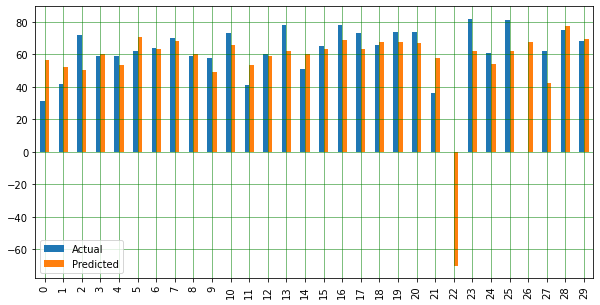

In [491]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df  #顯示實際值和預測值
df1 = df.head(30)

#視覺化：呈現實際值和預測值的差距
df1.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

ValueError: x and y must be the same size

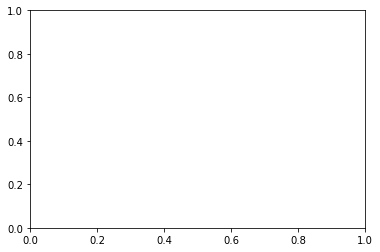

In [492]:
#建立迴歸線
# plt.scatter(data_top_50_artist['Danceability'], data_top_50_artist['Popularity'], color='gray')
plt.scatter(x_test, y_test, color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()

In [493]:
from sklearn import metrics
from sklearn.metrics import r2_score

# The coefficients
print("Coefficients:", regressor.coef_)

# The mean squared error
print("Mean squared error: %2f"  % metrics.mean_squared_error(y_test, y_pred))

## 迴歸模型的R Square
print("R Square: %.2f" % regressor.score(x_test, y_test))

# # The coefficient of determination: 1 is perfect prediction
# print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# #平均絕對誤差(MAE)、均方誤差(MSE)、均方根誤差(RMSE)
# print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
# print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Coefficients: [[ 0.1206139   0.26906186 -0.18697371  2.47447485  0.20778229 -0.03502104
  -0.07600526 -0.08838299  0.01236695]]
Mean squared error: 247.530537
R Square: 0.14
